# House Price Prediction

In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge

In [2]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Importing the dataset
data = pd.read_csv(r'D:\AI\house_price\home_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
#droping the unnecessary columns such as id, date, zipcode , lat and long
data.drop(['id','date'],axis=1,inplace=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# checking for null values/missing values
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
data.nunique()

price            4032
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

## Data Preprocessing

In [11]:
# changing float to integer
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)
# renaming the column yr_built to age and changing the values to age
data.rename(columns={'yr_built':'age'},inplace=True)
data['age'] = 2023 - data['age']
# changing the column yr_renovated to renovated and changing the values to 0 and 1
data.rename(columns={'yr_renovated':'renovated'},inplace=True)
data['renovated'] = data['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [12]:
# using simple feature scaling
data['sqft_living'] = data['sqft_living']/data['sqft_living'].max()
data['sqft_living15'] = data['sqft_living15']/data['sqft_living15'].max()
data['sqft_lot'] = data['sqft_lot']/data['sqft_lot'].max()
data['sqft_above'] = data['sqft_above']/data['sqft_above'].max()
data['sqft_basement'] = data['sqft_basement']/data['sqft_basement'].max()
data['sqft_lot15'] = data['sqft_lot15']/data['sqft_lot15'].max()

In [13]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,0.087149,0.003421,1,0,0,3,7,0.125399,0.000000,68,0,98178,47.5112,-122.257,0.215781,0.006485
1,538000,3,2,0.189808,0.004385,2,0,0,3,7,0.230606,0.082988,72,1,98125,47.7210,-122.319,0.272142,0.008768
2,180000,2,1,0.056869,0.006056,1,0,0,3,6,0.081828,0.000000,90,0,98028,47.7379,-122.233,0.438003,0.009254
3,604000,4,3,0.144756,0.003028,1,0,0,5,7,0.111583,0.188797,58,0,98136,47.5208,-122.393,0.219002,0.005739
4,510000,3,2,0.124077,0.004893,1,0,0,3,8,0.178533,0.000000,36,0,98074,47.6168,-122.045,0.289855,0.008612


## Exploratory Data Analysis

#### Correlation Matrix to find the relationship between the variables

In [14]:
# using correlation statistical method to find the relation between the price and other features
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.510072
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.237211
renovated        0.126092
sqft_lot         0.089661
sqft_lot15       0.082447
condition        0.036362
long             0.021626
zipcode         -0.053203
age             -0.054012
Name: price, dtype: float64

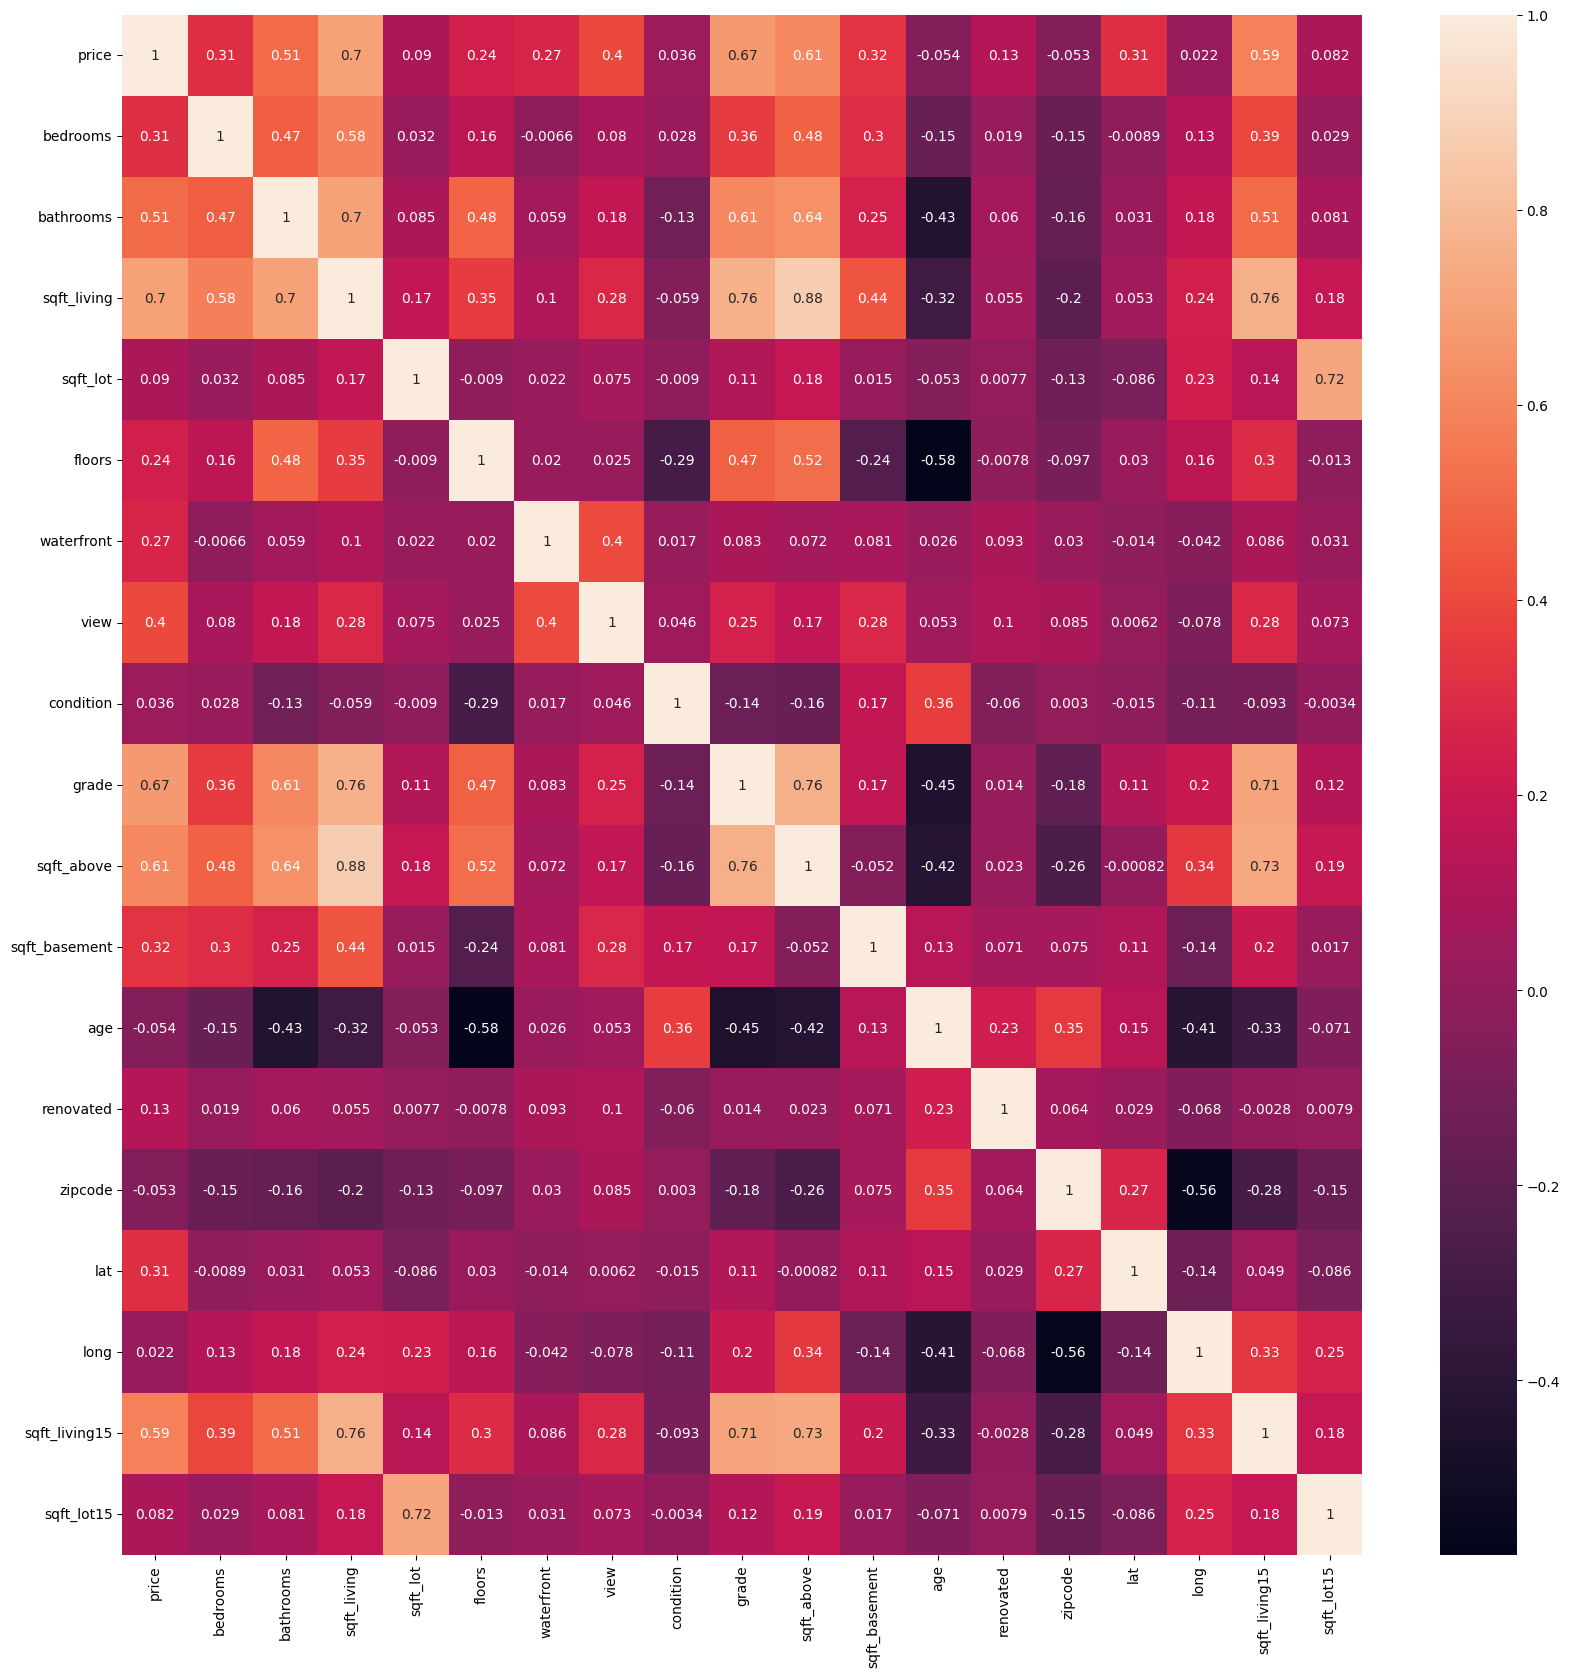

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Visualizing the coorelation with price

<Axes: >

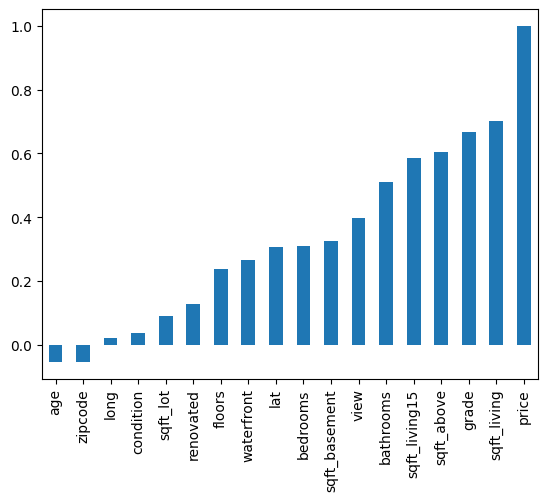

In [16]:
data.corr()['price'][:-1].sort_values().plot(kind='bar')

#### Visulaizing the data

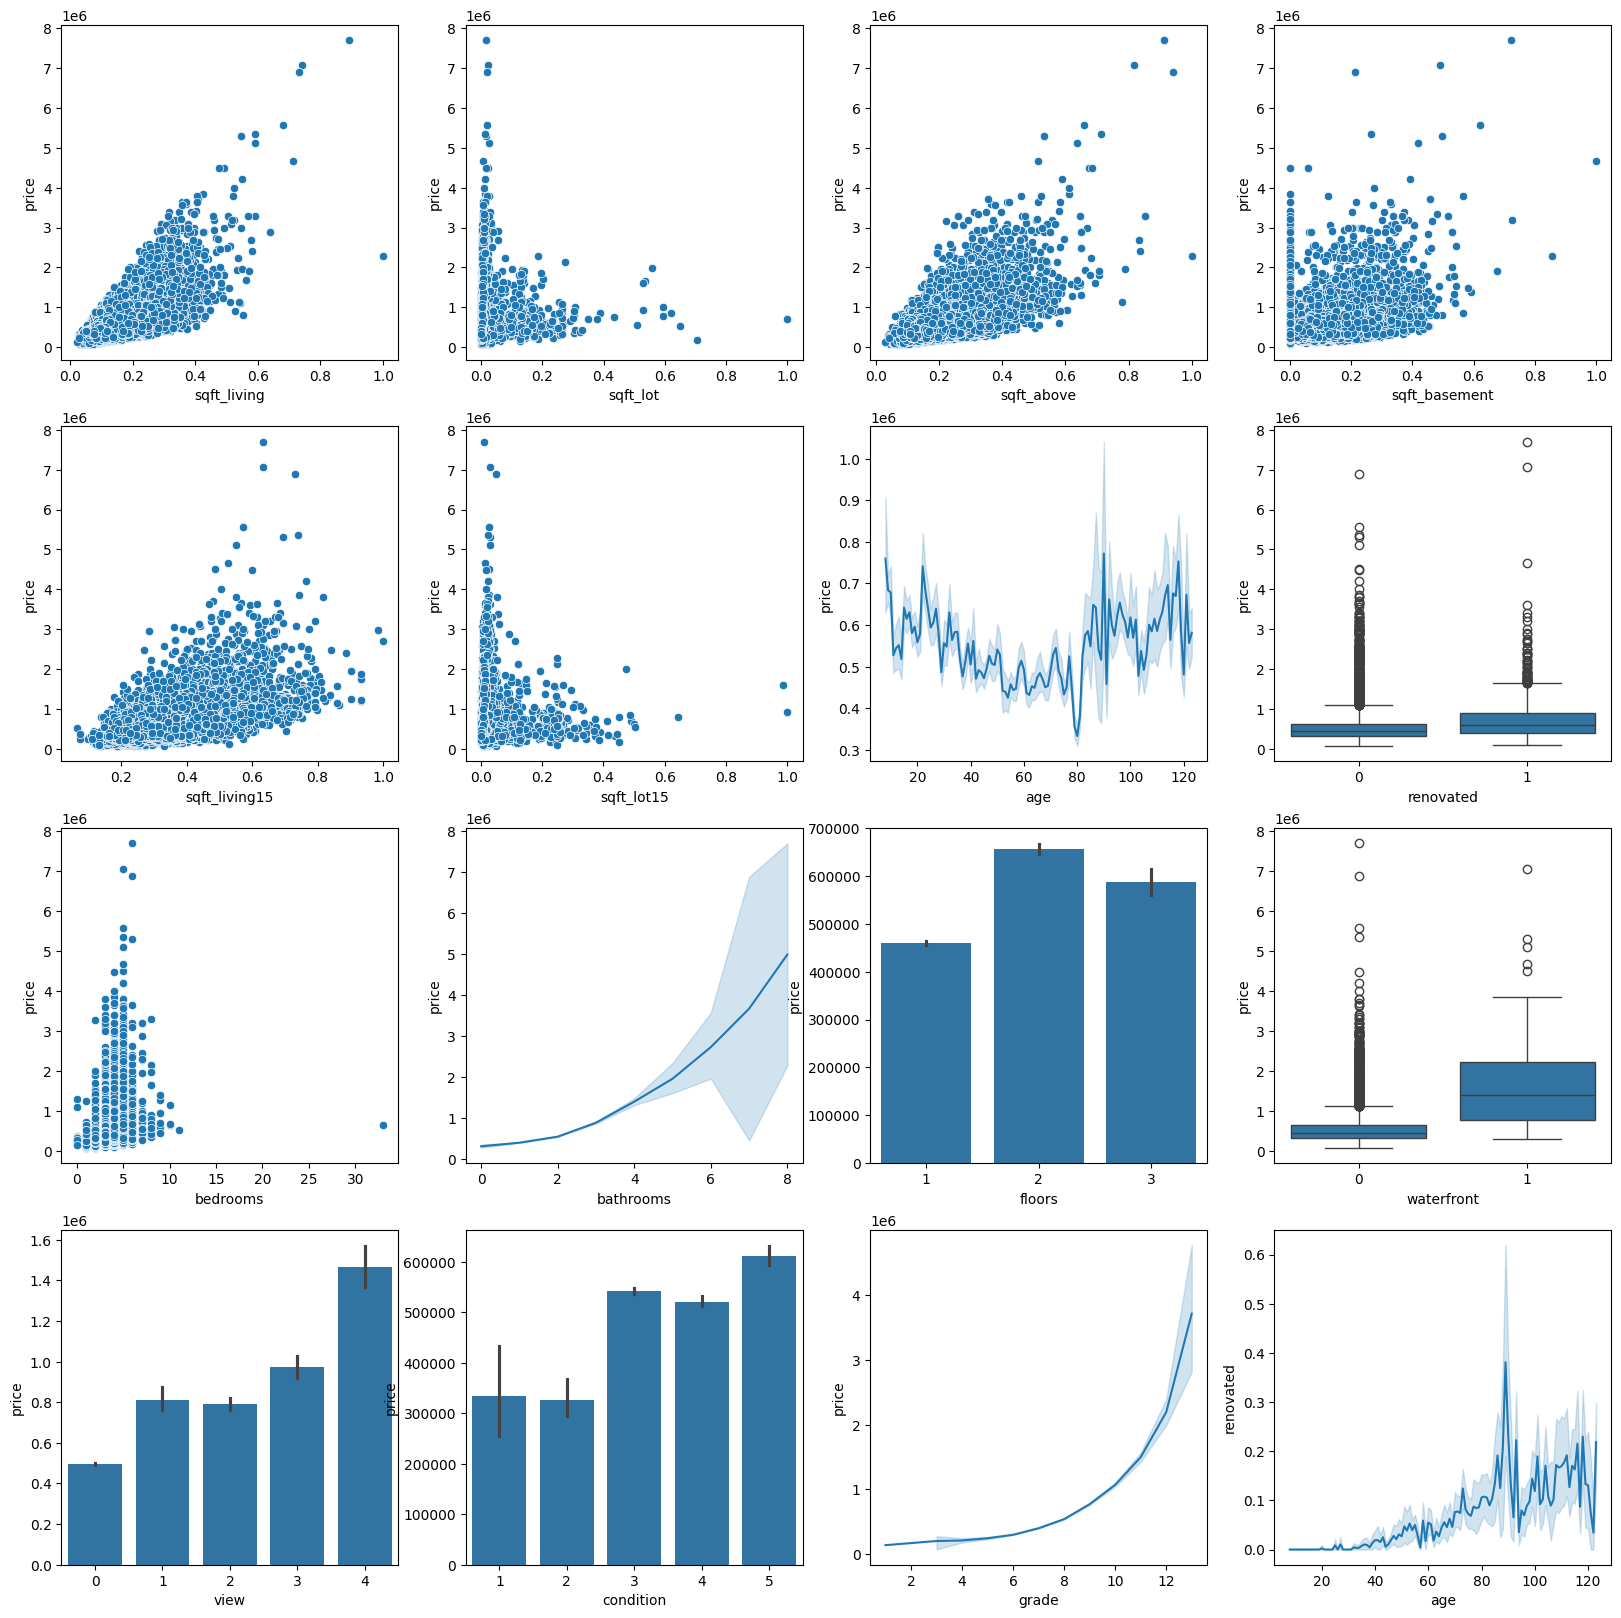

In [17]:
# visualizing the relation between price and sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, age, renovated, bedrooms, bathrooms, floors, waterfront, view, condition, grade
fig, ax = plt.subplots(4,4,figsize=(20,20))
sns.scatterplot( x = data['sqft_living'], y = data['price'],ax=ax[0,0])
sns.scatterplot( x = data['sqft_lot'], y = data['price'],ax=ax[0,1])
sns.scatterplot( x = data['sqft_above'], y = data['price'],ax=ax[0,2])
sns.scatterplot( x = data['sqft_basement'], y = data['price'],ax=ax[0,3])
sns.scatterplot( x = data['sqft_living15'], y = data['price'],ax=ax[1,0])
sns.scatterplot( x = data['sqft_lot15'], y = data['price'],ax=ax[1,1])
sns.lineplot( x = data['age'], y = data['price'],ax=ax[1,2])
sns.boxplot( x = data['renovated'], y = data['price'],ax=ax[1,3])
sns.scatterplot( x = data['bedrooms'], y = data['price'],ax=ax[2,0])
sns.lineplot( x = data['bathrooms'], y = data['price'],ax=ax[2,1])
sns.barplot( x = data['floors'], y = data['price'],ax=ax[2,2])
sns.boxplot( x = data['waterfront'], y = data['price'],ax=ax[2,3])
sns.barplot( x = data['view'], y = data['price'],ax=ax[3,0])
sns.barplot( x = data['condition'], y = data['price'],ax=ax[3,1])
sns.lineplot( x = data['grade'], y = data['price'],ax=ax[3,2])
sns.lineplot( x = data['age'], y = data['renovated'],ax=ax[3,3])
plt.show()

#### Plotting the location of the houses based on longitude and latitude on the map

In [18]:
# adding a new column price_range and categorizing the price into 4 categories
data['price_range'] = pd.cut(data['price'],bins=[0,321950,450000,645000,1295648],labels=['Low','Medium','High','Very High'])

In [19]:
map = folium.Map(location=[47.5480, -121.9836],zoom_start=8)
marker_cluster = FastMarkerCluster(data[['lat', 'long']].values.tolist()).add_to(map)
map

## Train/Test Split

In [20]:
data.drop(['price_range'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(data.drop('price',axis=1),data['price'],test_size=0.3,random_state=10)

## Model Training

### Using pipeline to combine the transformers and estimators and fit the model

In [21]:
input = [('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [22]:
#training the model
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8271770076878191

In [23]:
#testing the model
pipe_pred = pipe.predict(X_test)
r2_score(y_test,pipe_pred)

0.8271770076878191

### Ridge Regression

In [24]:
Ridgemodel = Ridge(alpha = 0.001)
Ridgemodel


Ridge(alpha=0.001)

In [25]:
# training the model
Ridgemodel.fit(X_train,y_train)
Ridgemodel.score(X_test,y_test)

0.7123220593275168

In [26]:
#testing the model
r_pred = Ridgemodel.predict(X_test)
r2_score(y_test,r_pred)

0.7123220593275168

### Random Forest Regression

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [28]:
# training the model
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.878968081057204

In [29]:
#testing the model
yhat = regressor.predict(X_test)
r2_score(y_test,yhat)

0.878968081057204

## Model Evalution

### Distribution plot from the models predictions and the actual values

C:\Users\Admin\AppData\Local\Temp\ipykernel_1504\114450484.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,ax=ax[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1504\114450484.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pipe_pred,ax=ax[0])
C:\Users\Admin\AppData\Local\Temp\ipy

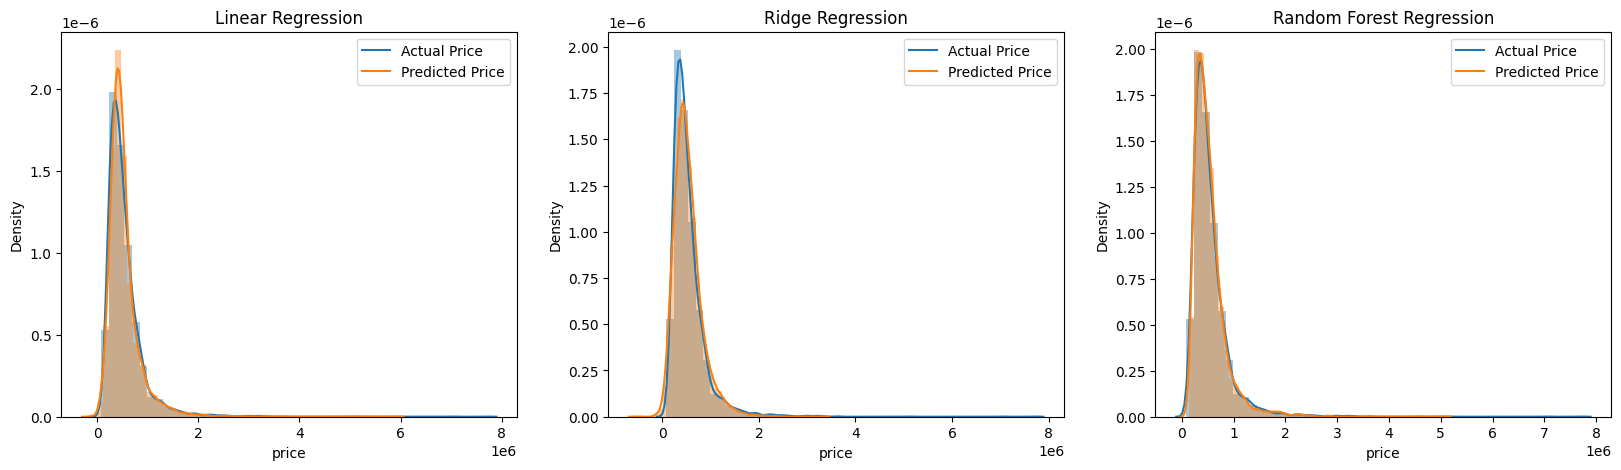

In [30]:
# displot of the actual price and predicted price for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(y_test,ax=ax[0])
sns.distplot(pipe_pred,ax=ax[0])
sns.distplot(y_test,ax=ax[1])
sns.distplot(r_pred,ax=ax[1])
sns.distplot(y_test,ax=ax[2])
sns.distplot(yhat,ax=ax[2])
# legends
ax[0].legend(['Actual Price','Predicted Price'])
ax[1].legend(['Actual Price','Predicted Price'])
ax[2].legend(['Actual Price','Predicted Price'])
#model name as title
ax[0].set_title('Linear Regression')
ax[1].set_title('Ridge Regression')
ax[2].set_title('Random Forest Regression')
plt.show()

### Error Evaluation

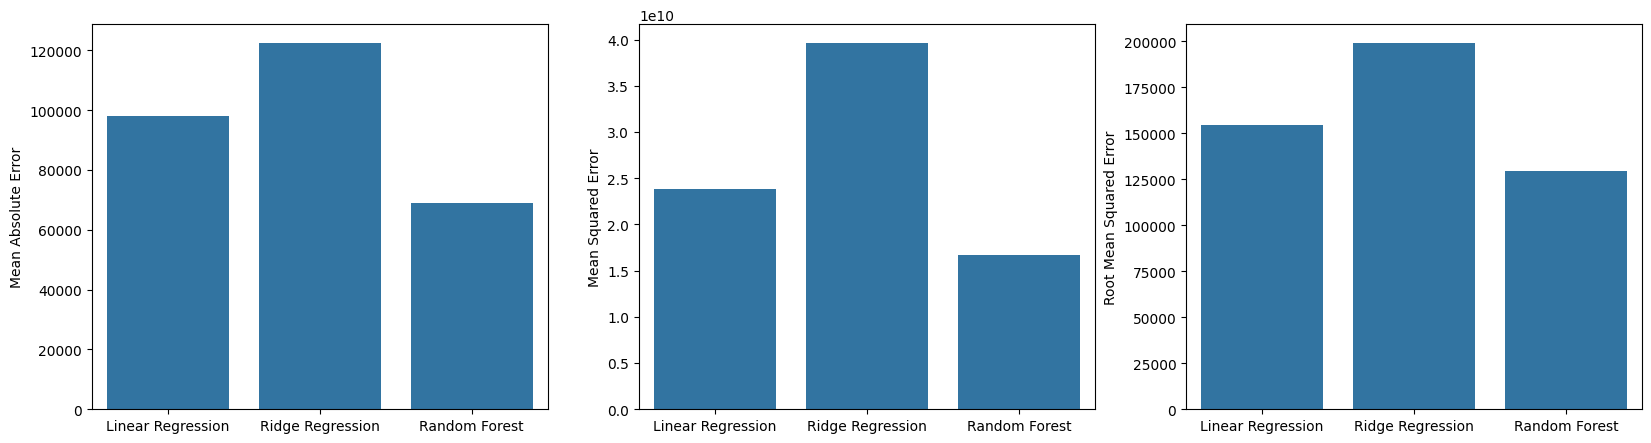

In [31]:
#plot the graph to compare mae, mse, rmse for all models
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_absolute_error(y_test,pipe_pred),mean_absolute_error(y_test,r_pred),mean_absolute_error(y_test,yhat)],ax=ax[0])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[mean_squared_error(y_test,pipe_pred),mean_squared_error(y_test,r_pred),mean_squared_error(y_test,yhat)],ax=ax[1])
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest'],y=[np.sqrt(mean_squared_error(y_test,pipe_pred)),np.sqrt(mean_squared_error(y_test,r_pred)),np.sqrt(mean_squared_error(y_test,yhat))],ax=ax[2])
# label for the graph
ax[0].set_ylabel('Mean Absolute Error')
ax[1].set_ylabel('Mean Squared Error')
ax[2].set_ylabel('Root Mean Squared Error')
plt.show()


#### Accuracy Evaluation

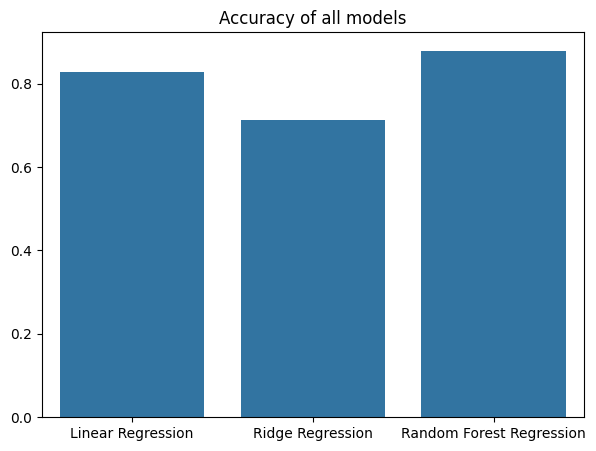

In [32]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=['Linear Regression','Ridge Regression','Random Forest Regression'],y=[metrics.r2_score(y_test,pipe_pred),metrics.r2_score(y_test,r_pred),metrics.r2_score(y_test,yhat)])
ax.set_title('Accuracy of all models')
plt.show()

## Predicting the price of a new house

In [33]:
#input the values
bedrooms = 3
bathrooms = 2
sqft_living = 2000
sqft_lot = 10000
floors = 2
waterfront = 0
view = 0
condition = 3
grade = 8
sqft_above = 2000
sqft_basement = 0
yr_built = 1990
yr_renovated = 0
zipcode = 98001
lat = 47.5480
long = -121.9836
sqft_living15 = 2000
sqft_lot15 = 10000


In [34]:
#predicting the price using random forest regression
price = regressor.predict([[bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]])
print('The price of the house is $',price[0])

The price of the house is $ 1078694.0533333335


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [35]:
import joblib

joblib.dump(regressor, 'house_price_model.pkl')


['house_price_model.pkl']